References
* https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
* http://derekgreene.com/slides/topic-modelling-with-scikitlearn.pdf

Count Vectorizer
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [1]:
import pandas as pd

In [2]:
datafilepath = "D:\Victoria\EMSE\p2\EMSE_DevInt\python\data\data_processed\data.csv"
savefilepath = "D:\Victoria\EMSE\p2\EMSE_DevInt\python\data\data_processed\processed_data.csv"

In [3]:
data = pd.read_csv(datafilepath)

In [4]:
data

,Unnamed: 0,dir,title,text
0,0,1000137,DTE.ExecuteCommand and wait,I would like use macros for publishing my weba...
1,1,10005544,Interview question: data structure to set all ...,I encountered the following interview question...
2,2,10007328,100% height -dynamic height footer at the bottom,I have the following webpage.\n\n\n\nand the s...
3,3,10010324,Login failed for user &quot;xxx&quot; Failed t...,Im using entity framework code first. When sta...
4,4,10011261,How to lowercase the text in the EditText of t...,I'm using a searchable item with suggestion in...
...,...,...,...,...
9936,9936,9974592,I2C_SLAVE ioctl purpose,I am writing code for implementing a simple r...
9937,9937,9987757,how to convert datetime to short date?,i have a table called as X and this table has ...
9938,9938,9989508,Creating random polygons within a set shapefil...,I have a shapefile which is the national bound...
9939,9939,9994838,FTS sqlite phrase search for single column not...,"i've been using the FTS extension of sqlite, a..."


In [5]:
titles_and_texts = data['title'] +" "+ data['text']

In [6]:
titles_and_texts

0       DTE.ExecuteCommand and wait I would like use m...
1       Interview question: data structure to set all ...
2       100% height -dynamic height footer at the bott...
3       Login failed for user &quot;xxx&quot; Failed t...
4       How to lowercase the text in the EditText of t...
                              ...                        
9936    I2C_SLAVE ioctl purpose I am writing code for ...
9937    how to convert datetime to short date? i have ...
9938    Creating random polygons within a set shapefil...
9939    FTS sqlite phrase search for single column not...
9940    &quot;Invalid signature file&quot; when attemp...
Length: 9941, dtype: object

In [7]:
from tokenization import process

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nimmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
processed_data = titles_and_texts.map(process)

In [22]:
data["processed_title_and_text"] = processed_data
data.to_csv(savefilepath)

In [9]:
list(processed_data.values[:5])

['dte executecommand wait would like use macro publish webappl project littl problem dte executecommand run asynchron need wait command done exampl synchron object inform state execut command',
 'interview question data structur set valu encount follow interview question internet describ data structur getvalu int index setvalu int index int valu setallvalu int valu though array good enough first second oper perform propos third setallvalu',
 'height dynam height footer bottom follow webpag style height footer dynam chang html structur css see webpag smaller screen height bodi greater viewport issu view webpag larger screen size bodi smaller viewport footer stick bottom also size bodi larg like exampl push footer bottom help footer alway stick bottom viewport without know height footer also height bodi content thank mihai',
 'login fail user quot xxx quot fail open explicitli specifi databas solut im use entiti framework code first start applic applic tri creat databas sqlserver error m

In [10]:
from wordcloud import WordCloud

In [11]:
long_string = ' '.join(list(processed_data.values))

In [12]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [13]:
wordcloud.generate(long_string)

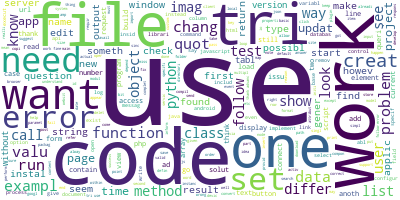

In [14]:
wordcloud.to_image()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [16]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words

d:\victoria\emse\p2\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


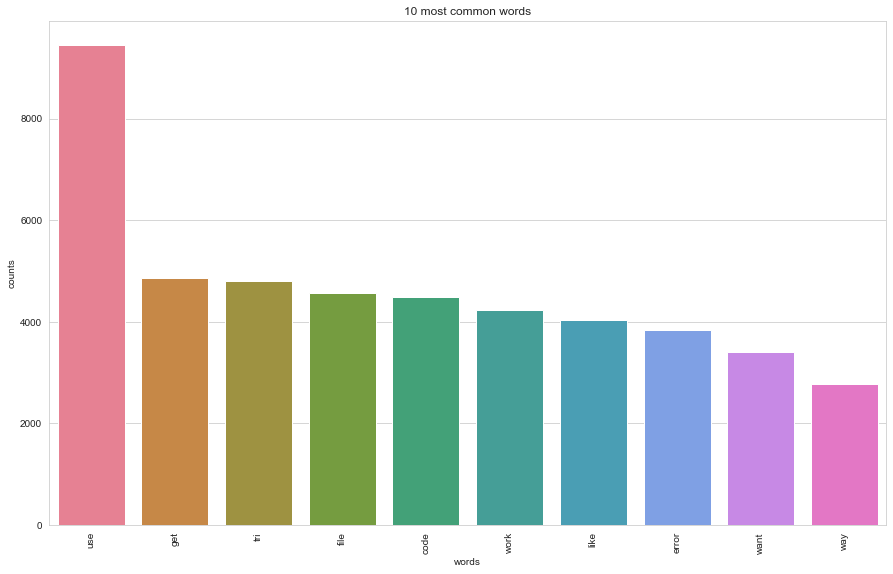

In [19]:
count_vectorizer = CountVectorizer()# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(processed_data)# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [20]:
words = count_vectorizer.get_feature_names()
len(words)

16914

In [21]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
use work code page tri want imag get button html

Topic #1:
file use run tri error get server instal command work

Topic #2:
use like get string valu way array function would want

Topic #3:
http use user com net java get code org tri

Topic #4:
use error tabl code column class tri get like creat


TODO

In [97]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

d:\victoria\emse\p2\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

d:\victoria\emse\p2\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
print(LDAvis_prepared)

with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)
    
#pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')



d:\victoria\emse\p2\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.065561  0.001994       1        1  31.167848
4     -0.000847 -0.146809       2        1  24.414160
0      0.133835  0.065333       3        1  19.056364
2     -0.109869  0.092059       4        1  14.693170
1     -0.088680 -0.012578       5        1  10.668458, topic_info=          Term        Freq       Total Category  logprob  loglift
619       list  124.000000  124.000000  Default  30.0000  30.0000
399       file   70.000000   70.000000  Default  29.0000  29.0000
1198  variable   40.000000   40.000000  Default  28.0000  28.0000
139      class   43.000000   43.000000  Default  27.0000  27.0000
741        one   17.000000   17.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
563       item    2.790938    9.529910   Topic5  -5.2581   1.0098
29     another    3.088371   13.426822   Topic5  -5

TypeError: write() argument must be str, not bytes

In [32]:
"i" in ["i", "o"]

True